### Case Study – Porfolio Optimization  (simulation)


#### Case Study – Portfolio Optimization
#### @author: Felipe



In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random


In [175]:
'''
Portfolio Optimization with Monte Carlo Simulation – Outline
* Loaded historical stock data for AMD, AAPL, MSFT, and ORCL.
* Built an equal-weighted portfolio and tracked its performance.
* Calculated key metrics: cumulative return, daily returns, Sharpe ratio.

* Ran a Monte Carlo simulation to generate 10,000 random portfolios with different weightings.
* Computed expected return, volatility, and Sharpe ratio for each simulated portfolio.
* Identified and visualized the portfolio with the highest Sharpe ratio.

'''

'\nPortfolio Optimization with Monte Carlo Simulation – Outline\n* Loaded historical stock data for AMD, AAPL, MSFT, and ORCL.\n* Built an equal-weighted portfolio and tracked its performance.\n* Calculated key metrics: cumulative return, daily returns, Sharpe ratio.\n\n* Ran a Monte Carlo simulation to generate 10,000 random portfolios with different weightings.\n* Computed expected return, volatility, and Sharpe ratio for each simulated portfolio.\n* Identified and visualized the portfolio with the highest Sharpe ratio.\n\n'

#### Load data and create DataFrames

In [ ]:
# Load data and create DataFrames
stocklist = ['AMD', 'AAPL', 'MSFT', 'ORCL']
stocks = {}

for i in stocklist:
    stocks[i] = pd.read_csv(str(i + '.csv'),                    # files (in folder) called 'AMD.csv', MSFT.csv...etc
                           parse_dates=True, index_col='Date' ) # parse_date guesses date format from csv
                                                                # index_col is indexing our data by date
stocks['AMD'].head() # visualize
# stocks is a dictionary pairing keys (dates) to values (adj close)

#### Create column of normalized returns

In [17]:
# Create column of normalized returns
for stock_key, stock_data in stocks.items():
    stock_data['Normalized Return'] = stock_data['Adj Close']/ stock_data['Adj Close'].iloc[0]
    
stock_data.head() # works.       # just dividing every price P_t by initial P_0  
stocks['AMD'].head() # works. 

,Adj Close,Normalized Return
Date,,
2019-01-02,18.830000,1.000000
2019-01-03,17.049999,0.905470
2019-01-04,19.000000,1.009028
2019-01-07,20.570000,1.092406
2019-01-08,20.750000,1.101965


#### Create Allocation and Position Value Columns

In [19]:
# Create Allocation and Position Value Columns to simulate
initial_investment = 10000 # 10k
weight = 0.25              # 25% per stock
for stock_name, stock_data in stocks.items():
    position_value = stock_data['Normalized Return'] * initial_investment * weight
    stock_data['Position Value'] = position_value
    
stocks['AMD'].head() # $2500 in day one, shows evolution per day.

,Adj Close,Normalized Return,Position Value
Date,,,
2019-01-02,18.830000,1.000000,2500.000000
2019-01-03,17.049999,0.905470,2263.674895
2019-01-04,19.000000,1.009028,2522.570377
2019-01-07,20.570000,1.092406,2731.014309
2019-01-08,20.750000,1.101965,2754.912385


#### Visualize portfolio performance 


In [27]:
# Visualize portfolio performance 
position_values = {}                          # create dict to organize and plot 
for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

position_values = pd.DataFrame(data=position_values) # convert to dataframe
position_values['Total'] = position_values.sum(axis=1) # add 'Total' column which sums all position values
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2019-01-02,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2019-01-03,2263.674895,2250.980945,2408.029568,2475.674577,9398.359984
2019-01-04,2522.570377,2347.074161,2520.025720,2582.374925,9972.045182
2019-01-07,2731.014309,2341.850477,2523.239483,2623.286049,10219.390319
2019-01-08,2754.912385,2386.493420,2541.534760,2647.059250,10329.999814


Text(0, 0.5, 'Total Value')

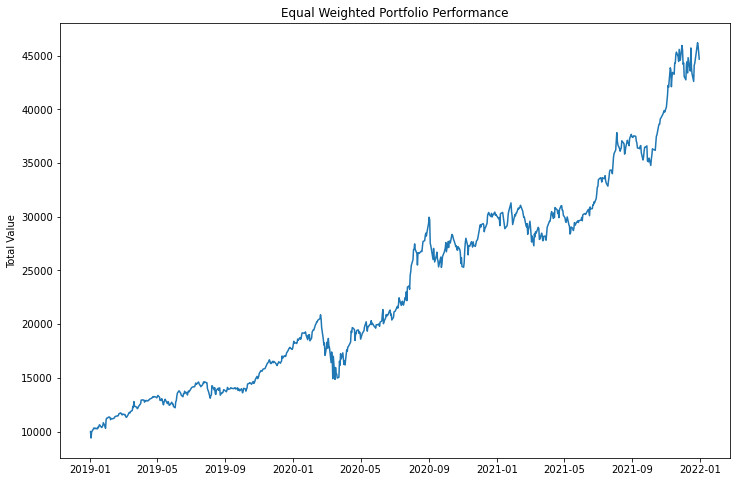

In [28]:
# View the Total Portfolio

plt.figure(figsize=(12,8))
plt.plot(position_values['Total'])
plt.title('Equal Weighted Portfolio Performance')
plt.ylabel('Total Value')

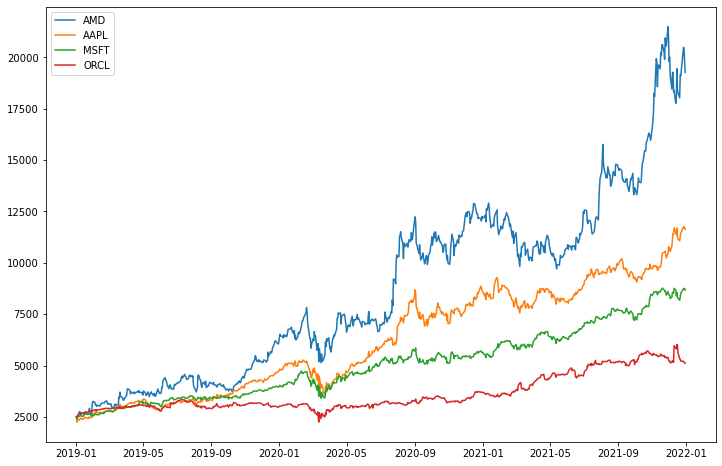

In [34]:
# Now one graph in whcih you can view all stocks independently.
plt.plot(position_values.iloc[:, :4]) #Looks at all rows and first 4 columns
plt.legend(position_values.columns)

#### Calculate Performance Metrics for the Portfolio

In [51]:
# Performance Statistics
# cumulative return
start_value = position_values['Total'][0] # initial amount investment
end_value = position_values['Total'][-1]  # final amount investment
cumulative_return = end_value/start_value - 1

# Daily Rrturns
position_values['Daily Returns'] = position_values['Total'].pct_change() # new col with % returns
# mean and standard deviation
mean_returns = position_values['Daily Returns'].mean()
std_returns = position_values['Daily Returns'].std()

# Sharpe Ratio
sharpe_ratio = mean_returns / std_returns
sharpe_ratio_annualized = sharpe_ratio * np.sqrt(250)

print("Portfolio Performance Summary")
print(f"Initial Investment: ${start_value:,.2f}")
print(f"Final Portfolio Value: ${end_value:,.2f}")
print(f"Cumulative Return: {cumulative_return:.2%}")
print(f"Average Daily Return: {mean_returns:.4f}")
print(f"Daily Return Std Dev: {std_returns:.4}")
print(f"Annualized Sharpe: {sharpe_ratio_annualized:.4f}")


Portfolio Performance Summary
Initial Investment: $10,000.00
Final Portfolio Value: $44,683.66
Cumulative Return: 346.84%
Average Daily Return: 0.0022
Daily Return Std Dev: 0.02068
Annualized Sharpe: 1.6809


#### Optimized Porfolio Weighting 

In [58]:
# create dataframe for all stocks closing prices and returns

stock_close = {}
for stock_name, stock_data in stocks.items():
    stock_close[stock_name] = stock_data['Adj Close']

stock_close = pd.DataFrame(data=stock_close)
stock_close.head() # visualize
stock_returns = stock_close.pct_change()
stock_returns.head() # first row is NaN since its first closing price in data

,AMD,AAPL,MSFT,ORCL
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.094530,-0.099608,-0.036788,-0.009730
2019-01-04,0.114370,0.042689,0.046509,0.043100
2019-01-07,0.082632,-0.002226,0.001275,0.015842
2019-01-08,0.008751,0.019063,0.007251,0.009062


#### Build and simulate 10,000 portfolio scenarios

In [144]:
scenarios = 10000
weights_array = np.zeros((scenarios, len(stock_returns.columns))) # (10,000x4) matrix
returns_array = np.zeros(scenarios)    # 10,000 returns
volatility_array = np.zeros(scenarios) # 10,000 volatilities
sharpe_array = np.zeros(scenarios) # 10,000 different sharpes

random.seed(84)
np.random.seed(84) 
# simulate random weighting for 10k portfolios of the same 4 stocks
for i in range(scenarios):
    numbers = np.array(np.random.random(4)) # 4 different random values
    weights = numbers / np.sum(numbers)     # use random values to assign weights per stock
    weights_array[i, :] = weights           # repeating for each i-th row, all columns. 

    # Compute returns, volatility, and sharpe for every single scenario
    
    returns_array[i] = np.sum(stock_returns.mean()*250*weights) # record returns for every iteration
    
    volatility_array[i] = np.sqrt(np.dot(weights.T, np.dot(stock_returns.cov()*250, weights))) # annualized with 250
                                                                                               # see attached picture for formula
    # Calculate Sharpe Ratio for each scneario      
    sharpe_array[i] = returns_array[i]/volatility_array[i]
    


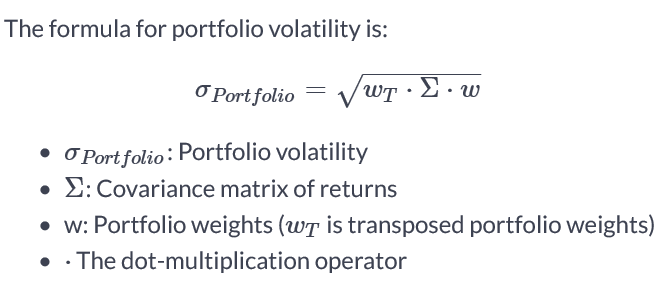 # formula for portfolio volatility used in volatility_array

#### Identify the Optimal Portfolio

In [152]:
best_sharpe = sharpe_array.max()
i_maxsharpe = sharpe_array.argmax() # .argmax() will tell you which index ith portfolio is it
print('The portfolio with the highest Sharpe Ratio', weights_array[i_maxsharpe])

The portfolio with the highest Sharpe Ratio [0.28214982 0.56972594 0.1461191  0.00200514]


#### Graph distribution of porfolios and locate optimal 

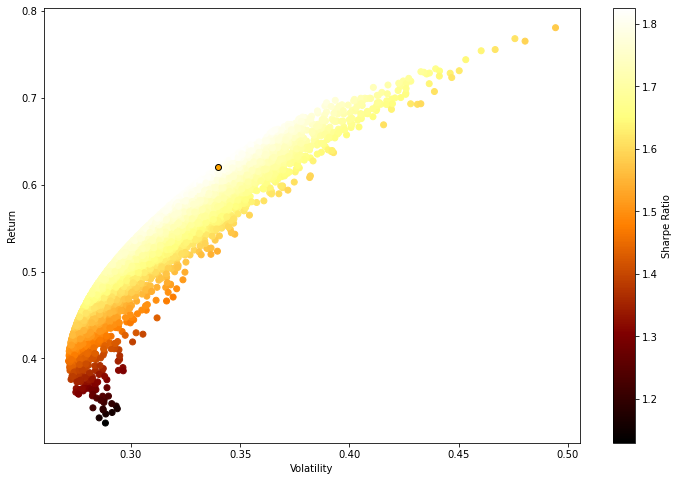

In [169]:
# Identify portfolio in both Returns and Volatility arrays
best_return = returns_array[i_maxsharpe]
best_volatility = volatility_array[i_maxsharpe]

# plot return as a function of volatility
plt.figure(figsize=(12, 8))
plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='afmhot')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility') 
plt.ylabel('Return')

# Signal the Optimal Portfolio in the Visual
plt.scatter(best_volatility, best_return, c='orange', edgecolors='black')

In [174]:
print(f"Optimal Portfolio Weights: AMD={weights_array[i_maxsharpe,0]:.2%}, AAPL={weights_array[i_maxsharpe,1]:.2%}, MSFT={weights_array[i_maxsharpe,2]:.2%}, ORCL={weights_array[i_maxsharpe,3]:.2%} | Sharpe Ratio: {best_sharpe:.4f}")


Optimal Portfolio Weights: AMD=28.21%, AAPL=56.97%, MSFT=14.61%, ORCL=0.20% | Sharpe Ratio: 1.8255


Optimal Portfolio Weights: AMD = 28.21%, AAPL = 56.97%, MSFT = 14.61%, ORCL = 0.20% | Sharpe Ratio: 1.8255



##### In the corollary to this case study, adjacent file, we compared this results to carrying a constrained SLSQP optimization algorithm
##### for the same problem. SLSQP performed slighly better.